In [1]:
from pystac_client import Client
from IPython.display import display
import planetary_computer

LONGMONT = {"type": "Point", "coordinates": [-105.1019, 40.1672]}

client = Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)
item_search = client.search(
    max_items=1, collections="modis-10A1-061", intersects=LONGMONT
)
item = next(item_search.items())
display(item)

<Item id=MYD10A1.A2023132.h10v04.061.2023134071222>

In [2]:
from stactools.core.utils.raster_footprint import RasterFootprint

footprint = RasterFootprint.from_href(item.assets["NDSI_Snow_Cover"].href)

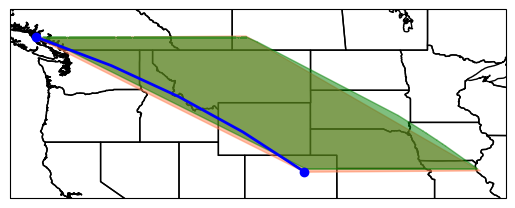

In [3]:
import shapely.geometry
from cartopy.crs import PlateCarree, Geodetic
from cartopy.feature import STATES
from matplotlib import pyplot

BUFFER = 2

start = item.geometry["coordinates"][0][0]
end = item.geometry["coordinates"][0][1]

plate_carree = PlateCarree()
# Needed to plot the great circle like a curve, instead of a angular line.
# Thanks https://stackoverflow.com/questions/60685245/plot-fine-grained-geodesic-with-cartopy/60724892
plate_carree._threshold = plate_carree._threshold / 10
axes = pyplot.axes(projection=plate_carree)
axes.coastlines()
axes.add_feature(STATES)
axes.add_geometries(
    shapely.geometry.shape(item.geometry), crs=PlateCarree(), color="coral", alpha=0.5
)
axes.add_geometries(
    shapely.geometry.shape(footprint.footprint()),
    crs=PlateCarree(),
    color="green",
    alpha=0.5,
)
axes.set_xlim((item.bbox[0] - BUFFER, item.bbox[2] + BUFFER))
axes.set_ylim((item.bbox[1] - BUFFER, item.bbox[3] + BUFFER))
pyplot.plot(
    [start[0], end[0]],
    [start[1], end[1]],
    color="blue",
    linewidth=2,
    marker="o",
    transform=Geodetic(),
)
pyplot.show()